In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/premiums_young_with_gr.xlsx')
df.head()


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [3]:
df.shape

(20096, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20096 entries, 0 to 20095
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    20096 non-null  int64 
 1   Gender                 20096 non-null  object
 2   Region                 20096 non-null  object
 3   Marital_status         20096 non-null  object
 4   Number Of Dependants   20096 non-null  int64 
 5   BMI_Category           20096 non-null  object
 6   Smoking_Status         20094 non-null  object
 7   Employment_Status      20095 non-null  object
 8   Income_Level           20092 non-null  object
 9   Income_Lakhs           20096 non-null  int64 
 10  Medical History        20096 non-null  object
 11  Insurance_Plan         20096 non-null  object
 12  Annual_Premium_Amount  20096 non-null  int64 
 13  Genetical_Risk         20096 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.1+ MB


### Converting columns into consistent naming

In [5]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [6]:
df.sample()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
1343,18,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Bronze,4228,0


In [7]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

### Handle NA values

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


#### max age is 356 and min number_of_dependents are -3 , which is practically impossible.

In [13]:
df[df.number_of_dependants<0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
150,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309,2
871,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095,0
906,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641,1
2462,20,Male,Northeast,Unmarried,-3,Underweight,Regular,Freelancer,10L - 25L,20,Diabetes,Silver,9640,1
3059,20,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Salaried,> 40L,77,No Disease,Silver,9299,2
3120,25,Male,Northwest,Unmarried,-1,Underweight,No Smoking,Salaried,10L - 25L,13,No Disease,Bronze,7234,3
3780,23,Female,Southeast,Unmarried,-3,Normal,Regular,Freelancer,25L - 40L,40,No Disease,Bronze,5003,0
5593,25,Male,Northwest,Unmarried,-1,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,6299,2
7585,22,Male,Northwest,Unmarried,-3,Normal,Occasional,Self-Employed,<10L,8,No Disease,Gold,13596,2
9765,18,Female,Southeast,Unmarried,-1,Underweight,No Smoking,Self-Employed,<10L,4,No Disease,Bronze,9366,5


In [14]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1], dtype=int64)

#### converting negative values into positive values

In [15]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df.number_of_dependants.describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

In [16]:
df.age.describe()

count    20090.000000
mean        21.494375
std          2.294052
min         18.000000
25%         19.000000
50%         22.000000
75%         23.000000
max         25.000000
Name: age, dtype: float64

### Vizualization

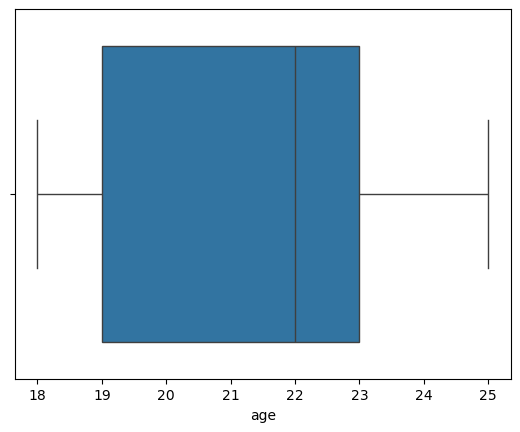

In [17]:
sns.boxplot(x=df['age'])
plt.show()

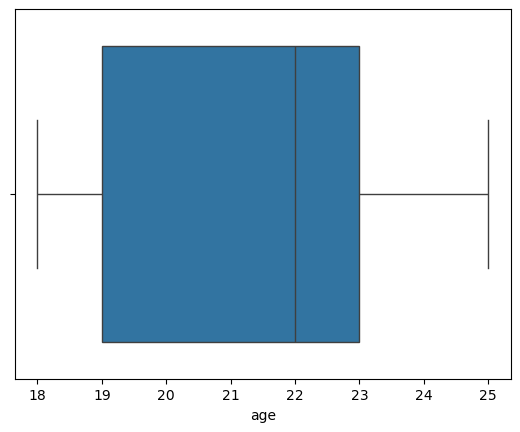

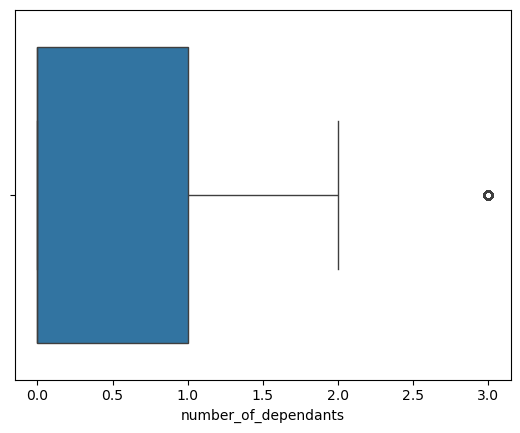

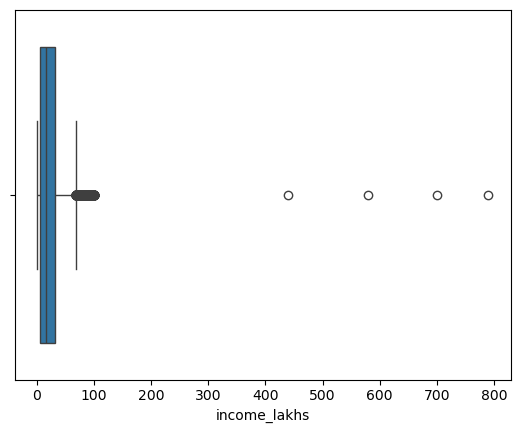

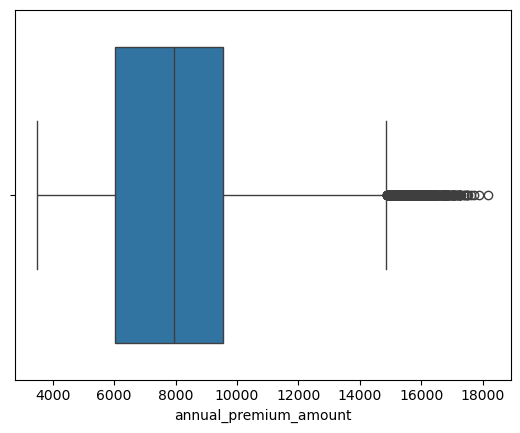

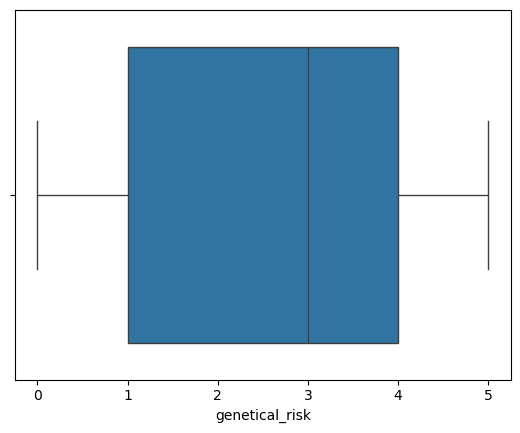

In [18]:
numeric_columns = df.select_dtypes(include=np.number).columns

for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()
    

In [19]:
df[df.age>100].shape

(0, 14)

In [20]:
df[df.age>100]['age'].unique()

array([], dtype=int64)

In [21]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

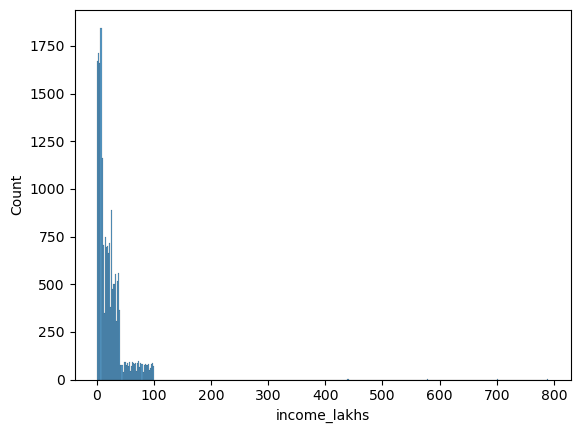

In [22]:
sns.histplot(df1.income_lakhs)

In [23]:
df.income_lakhs.quantile([0.25,0.75])

0.25     6.0
0.75    31.0
Name: income_lakhs, dtype: float64

In [24]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [25]:
get_iqr_bounds(df1.income_lakhs)

(-31.5, 68.5)

In [26]:
df1.income_lakhs.quantile(0.999)

100.0

In [27]:
quantile_threshold = df1.income_lakhs.quantile(0.999)

In [28]:
df1[df1.income_lakhs>quantile_threshold].shape

(4, 14)

In [29]:
df2 = df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

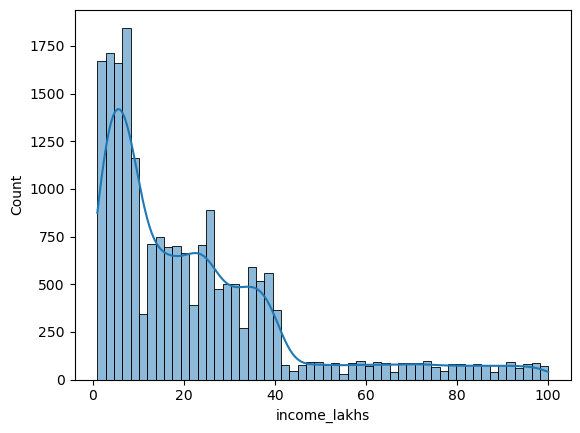

In [30]:
sns.histplot(df2['income_lakhs'], kde=True)

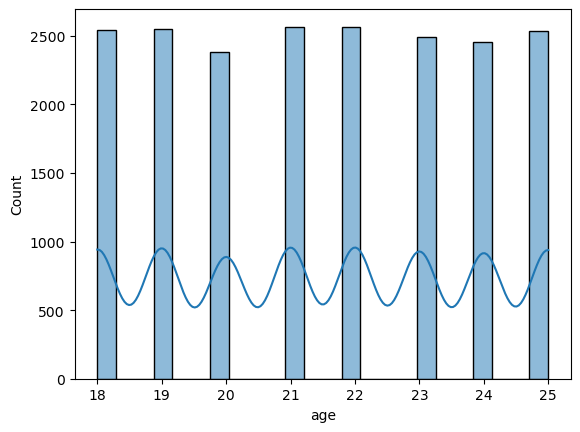

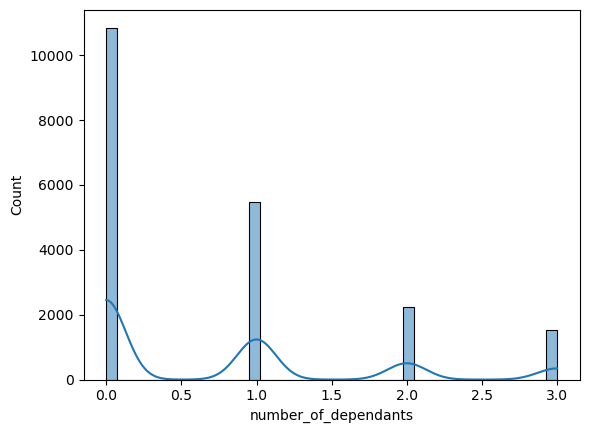

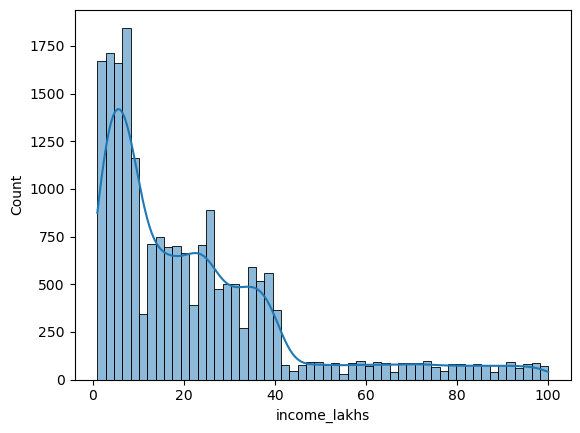

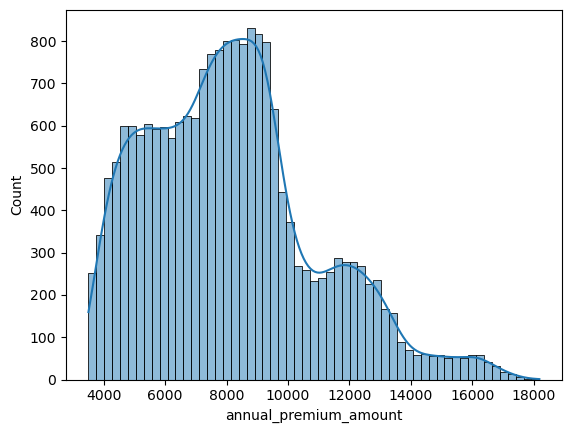

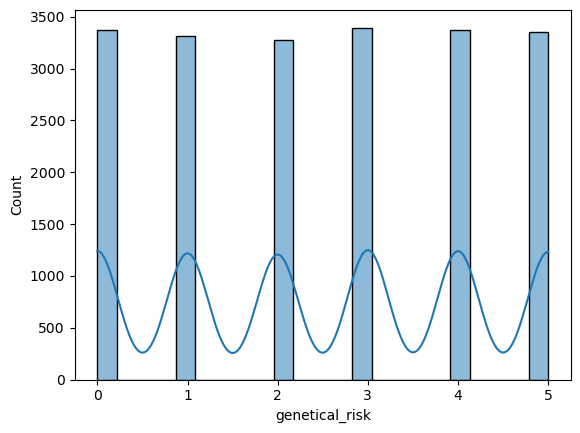

In [31]:
for col in numeric_columns:
    sns.histplot(df2[col], kde=True)
    plt.show()

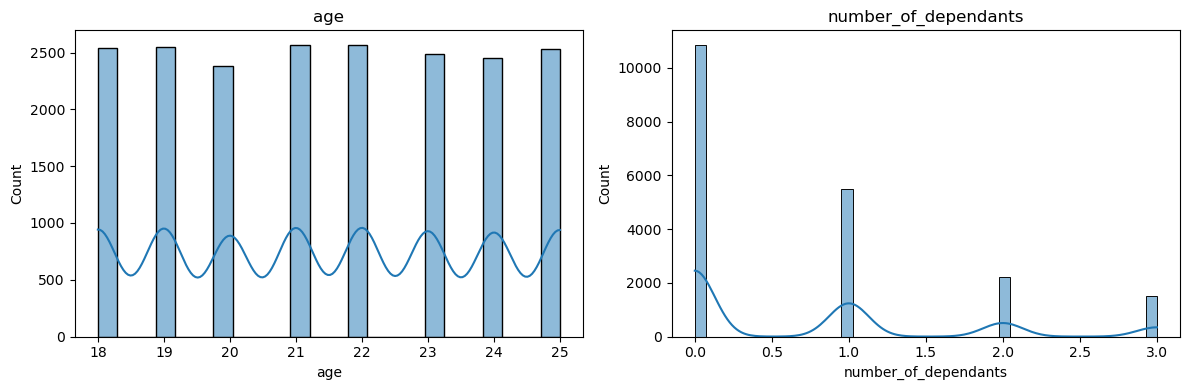

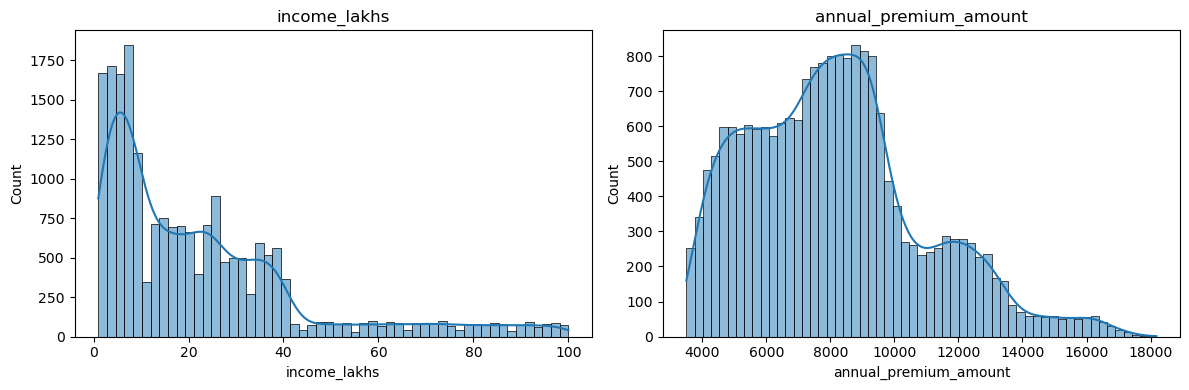

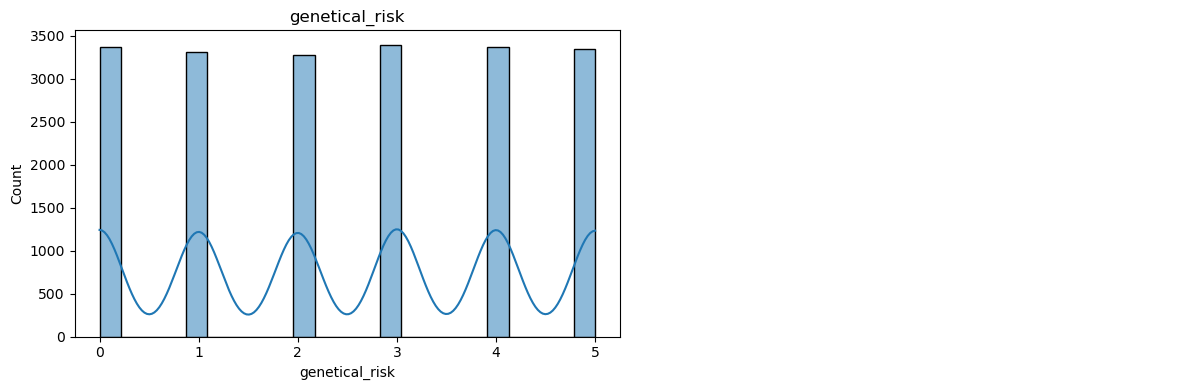

In [32]:
for i in range(0, len(numeric_columns), 2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # First plot
    sns.histplot(df2[numeric_columns[i]], kde=True, ax=axes[0])
    axes[0].set_title(numeric_columns[i])
    
    # Second plot (check if exists)
    if i + 1 < len(numeric_columns):
        sns.histplot(df2[numeric_columns[i+1]], kde=True, ax=axes[1])
        axes[1].set_title(numeric_columns[i+1])
    else:
        axes[1].axis("off")  # hide empty plot
    
    plt.tight_layout()
    plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

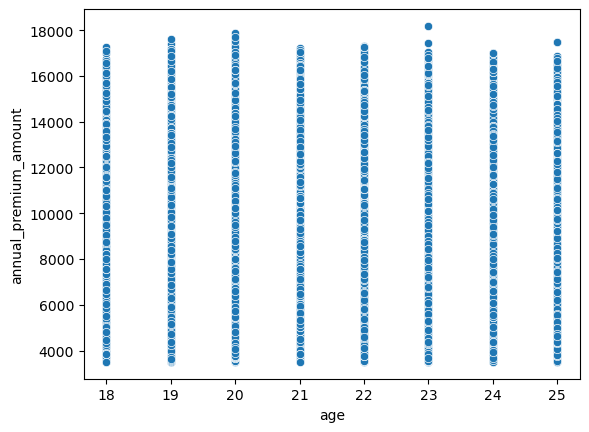

In [33]:
sns.scatterplot(df2, x='age', y='annual_premium_amount')

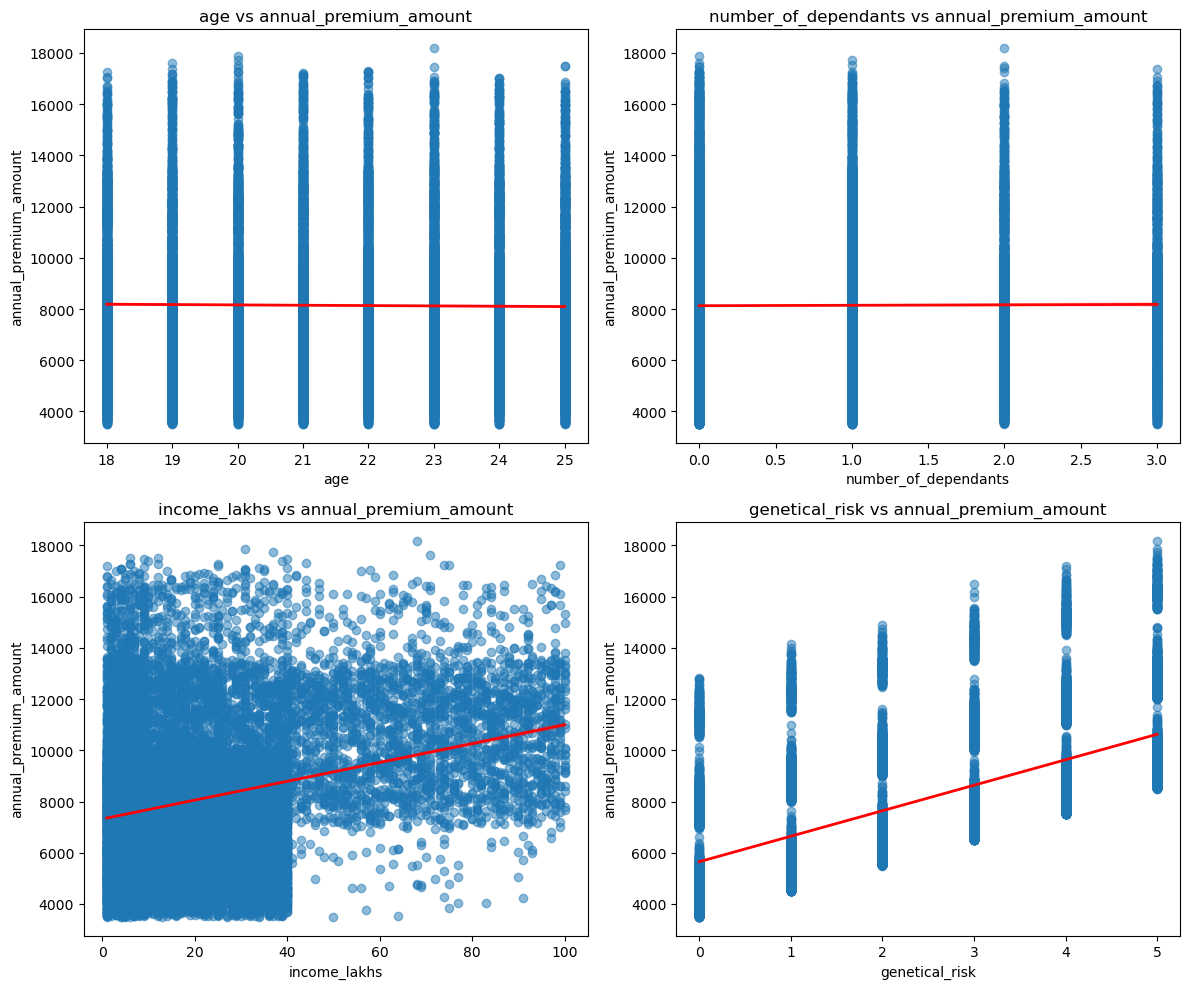

In [34]:

import math

target = 'annual_premium_amount'

# Remove target if it's inside numeric_columns
features = [col for col in numeric_columns if col != target]

n_cols = 2
n_rows = math.ceil(len(features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.regplot(
        data=df2,
        x=col,
        y=target,
        ax=axes[i],
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red', 'linewidth': 2}
    )
    axes[i].set_title(f"{col} vs {target}")

# Hide extra empty plots
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [35]:
categorical_columns = df2.select_dtypes(exclude=np.number).columns
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [36]:
for col in categorical_columns:
    print(col , ':', df2[col].unique())
    print('-'*60)

gender : ['Male' 'Female']
------------------------------------------------------------
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
------------------------------------------------------------
marital_status : ['Unmarried' 'Married']
------------------------------------------------------------
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
------------------------------------------------------------
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
------------------------------------------------------------
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
------------------------------------------------------------
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
------------------------------------------------------------
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'T

In [37]:
df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
}, inplace=True)

C:\Users\bansa\AppData\Local\Temp\ipykernel_27676\4234562676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


In [38]:
df2.smoking_status.unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [39]:
for col in categorical_columns:
    print(df2[col].value_counts(normalize=True))
    print('-'*70)

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64
----------------------------------------------------------------------
region
Southeast    0.346958
Southwest    0.304590
Northwest    0.201284
Northeast    0.147167
Name: proportion, dtype: float64
----------------------------------------------------------------------
marital_status
Unmarried    0.899881
Married      0.100119
Name: proportion, dtype: float64
----------------------------------------------------------------------
bmi_category
Normal         0.577467
Underweight    0.222493
Overweight     0.136513
Obesity        0.063527
Name: proportion, dtype: float64
----------------------------------------------------------------------
smoking_status
No Smoking    0.690033
Regular       0.223589
Occasional    0.086379
Name: proportion, dtype: float64
----------------------------------------------------------------------
employment_status
Freelancer       0.500000
Salaried         0.350045
Self-Employed    0

<Axes: xlabel='gender', ylabel='annual_premium_amount'>

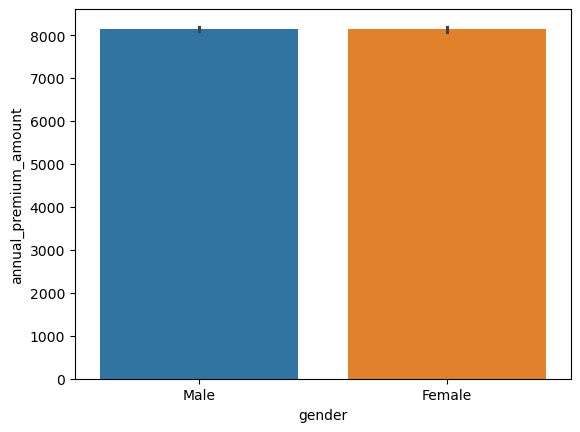

In [40]:
sns.barplot(df2,x='gender', y='annual_premium_amount',hue='gender')

In [41]:
pct_count = df2.gender.value_counts(normalize=True)


<Axes: xlabel='gender'>

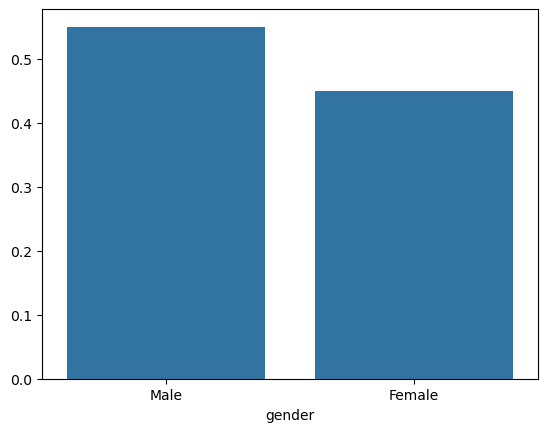

In [42]:
sns.barplot(x=pct_count.index, y=pct_count.values
            )

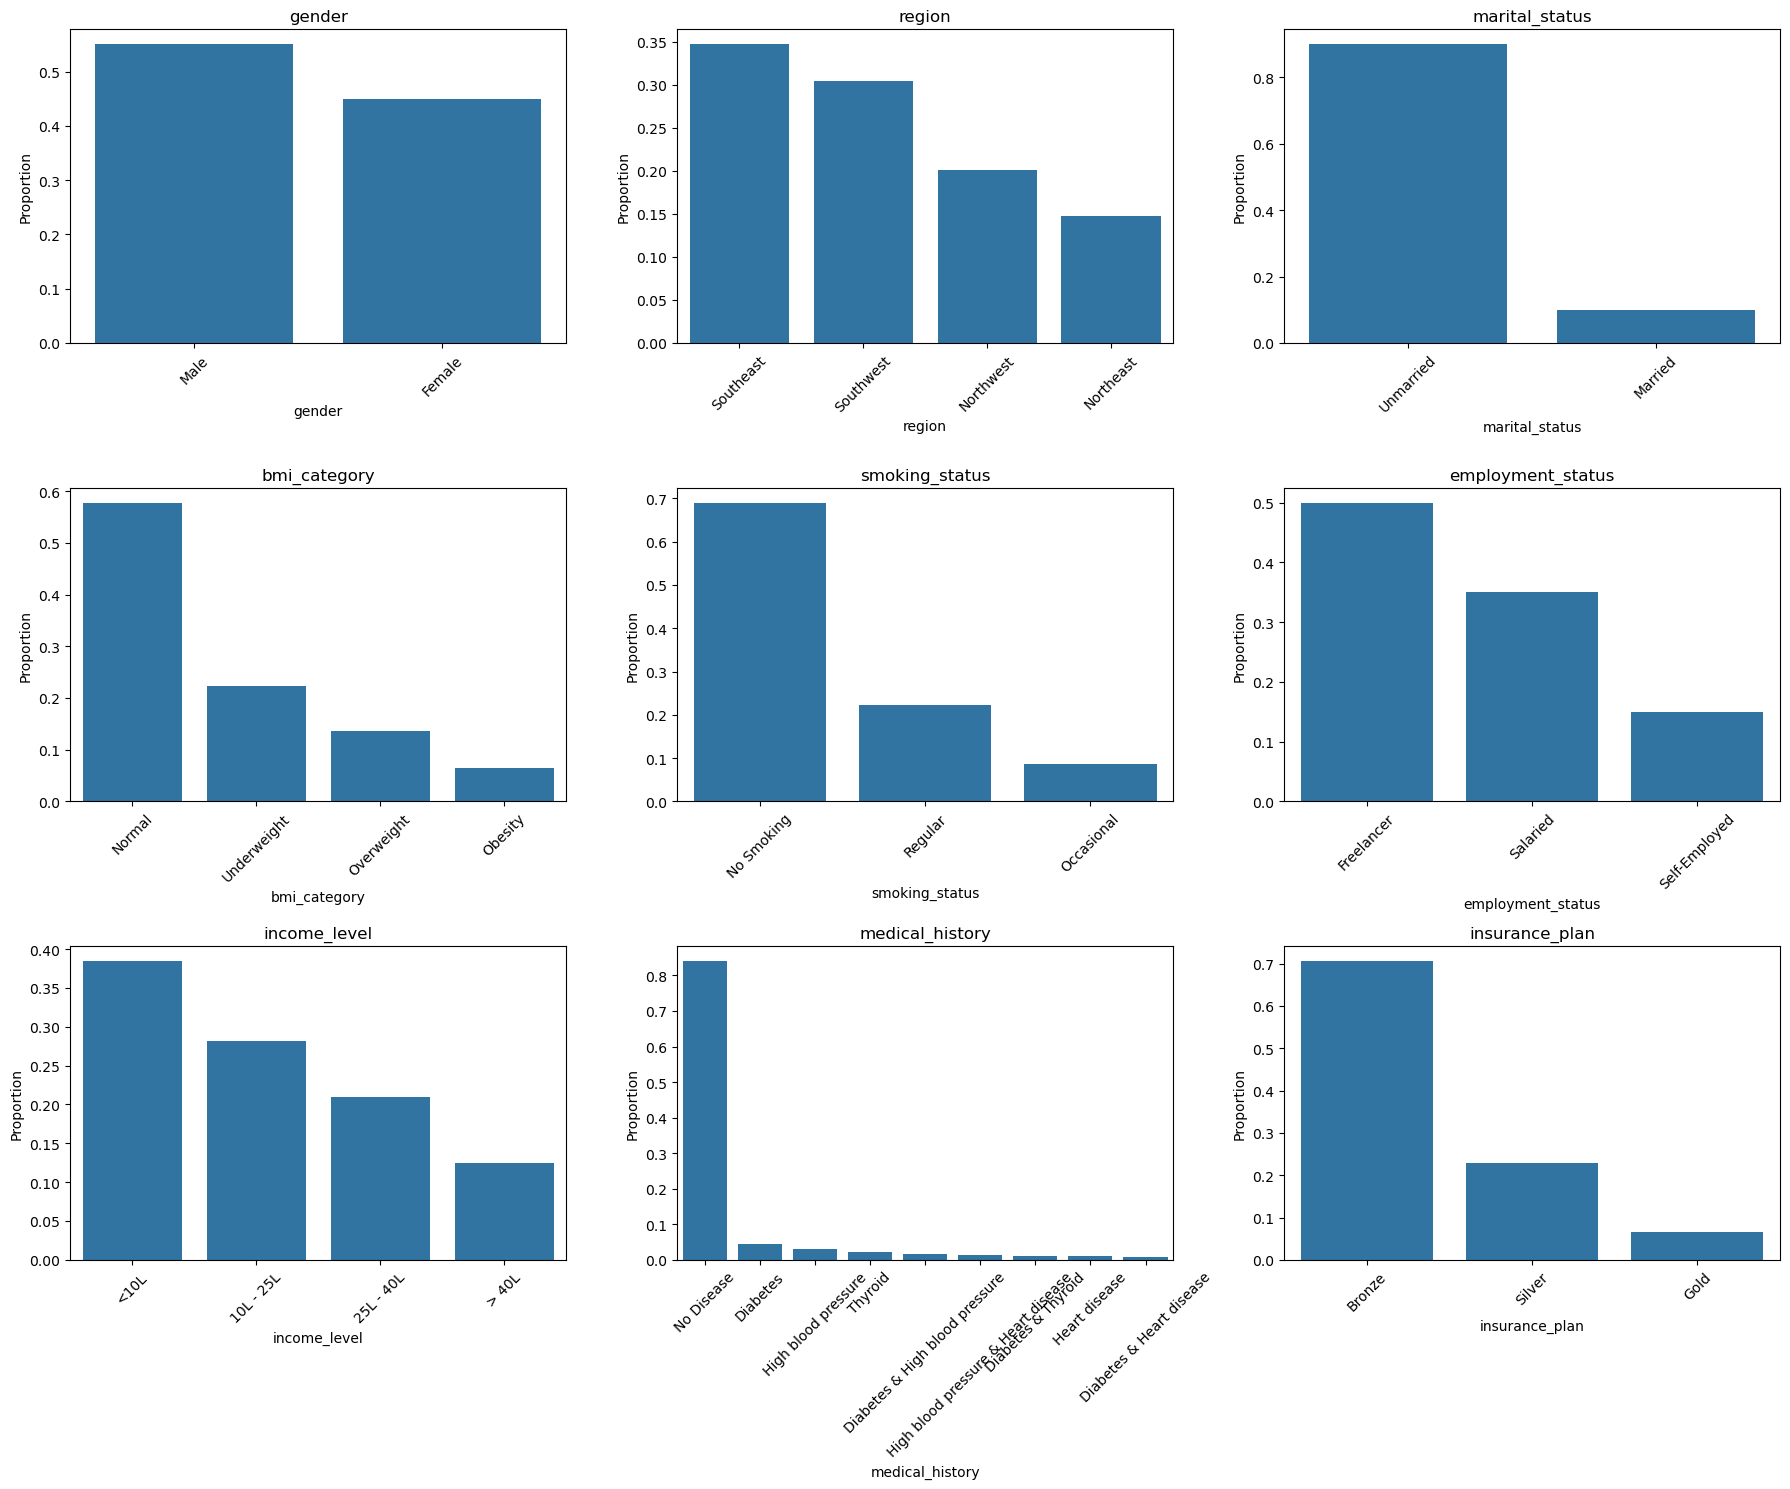

In [43]:
n_cols = 3   # 👈 3 charts per row
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    
    freq = df2[col].value_counts(normalize=True)
    
    sns.barplot(
        x=freq.index,
        y=freq.values,
        ax=axes[i]
    )
    
    axes[i].set_title(col)
    axes[i].set_ylabel("Proportion")
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty plots if any
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [44]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
crosstab


insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,366,2023


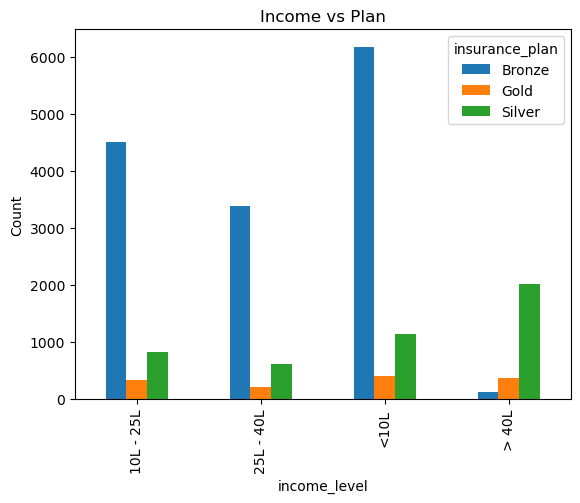

In [45]:
crosstab.plot(kind='bar')
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [46]:
df2.sample()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
7074,21,Female,Northwest,Unmarried,1,Overweight,Regular,Freelancer,<10L,2,No Disease,Bronze,8141,3


In [47]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

#### As per domain understanding , we are assigning risk score to diseases

In [48]:
risk_score = {
    'diabetes': 6,
    'heart disease': 8,
    'high blood pressure': 6,
    'thyroid': 5,
    'no disease': 0,
    'none': 0
}

df2[['disease1','disease2']] = (
    df2.medical_history.str.split('&', expand=True)
    .apply(lambda x: x.str.lower().str.strip())
)

df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)

df2['total_risk_score'] = 0
for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_score)

C:\Users\bansa\AppData\Local\Temp\ipykernel_27676\2481471933.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\bansa\AppData\Local\Temp\ipykernel_27676\2481471933.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [49]:
print(df2[['disease1', 'disease2', 'total_risk_score']].sample(10))

         disease1             disease2  total_risk_score
17690    diabetes  high blood pressure                12
15197  no disease                 none                 0
16817  no disease                 none                 0
3456   no disease                 none                 0
6970   no disease                 none                 0
16228  no disease                 none                 0
17456  no disease                 none                 0
9602   no disease                 none                 0
7371   no disease                 none                 0
19861     thyroid                 none                 5


In [50]:
max_score = df2.total_risk_score.max()
min_score = df2.total_risk_score.min()

df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
6715,21,Male,Southwest,Unmarried,1,Normal,No Smoking,Salaried,<10L,7,No Disease,Bronze,9376,5,no disease,none,0,0.0
17919,22,Male,Southeast,Unmarried,0,Overweight,Regular,Freelancer,10L - 25L,10,No Disease,Bronze,8110,3,no disease,none,0,0.0
274,25,Male,Southwest,Unmarried,1,Underweight,No Smoking,Salaried,<10L,6,No Disease,Silver,12315,5,no disease,none,0,0.0
20019,19,Female,Southeast,Married,3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Bronze,8904,5,no disease,none,0,0.0
19307,19,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,6,No Disease,Gold,14247,3,no disease,none,0,0.0


In [51]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [52]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
df2.insurance_plan.unique()

array([2, 1, 3], dtype=int64)

In [53]:
df2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [54]:
df2['income_level'] = df2['income_level'].map({'<10L': 1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})
df2.sample(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
2534,25,Male,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,2,13,Diabetes & Heart disease,1,7872,3,diabetes,heart disease,14,1.0
19434,25,Male,Northeast,Unmarried,0,Normal,No Smoking,Freelancer,3,35,No Disease,1,5216,1,no disease,none,0,0.0
10084,24,Male,Southwest,Married,2,Normal,No Smoking,Salaried,3,28,No Disease,1,8848,5,no disease,none,0,0.0


In [55]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk', 'disease1', 'disease2',
       'total_risk_score', 'normalized_risk_score'],
      dtype='object')

In [56]:
nominal_cols = ['gender', 'region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.sample(5)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
15225,18,2,2,16,No Disease,1,8990,5,no disease,none,...,0,1,0,0,0,0,0,0,0,0
8329,24,0,1,7,No Disease,1,6384,2,no disease,none,...,0,0,1,0,0,0,0,1,1,0
912,22,1,2,16,No Disease,1,7844,3,no disease,none,...,0,0,1,0,1,0,0,0,0,0
14532,21,2,4,72,No Disease,2,8610,1,no disease,none,...,0,0,1,0,0,0,0,0,0,1
141,23,0,2,20,No Disease,1,8687,4,no disease,none,...,0,0,1,0,0,1,1,0,0,1


In [57]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'], axis=1)
df4.sample(5)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
15611,25,0,1,1,1,7535,3,0.0,1,0,0,1,1,0,0,1,0,0,0,0
15796,19,2,3,31,3,12918,2,0.0,0,1,0,0,1,0,0,0,0,0,0,1
15708,20,0,2,22,1,8435,4,0.0,0,0,1,0,1,0,0,0,0,0,0,0
4391,18,0,1,7,1,6132,2,0.0,1,0,1,0,1,0,0,0,0,0,1,0
18653,23,0,3,28,1,7241,3,0.0,0,0,1,0,1,0,0,0,1,0,0,1


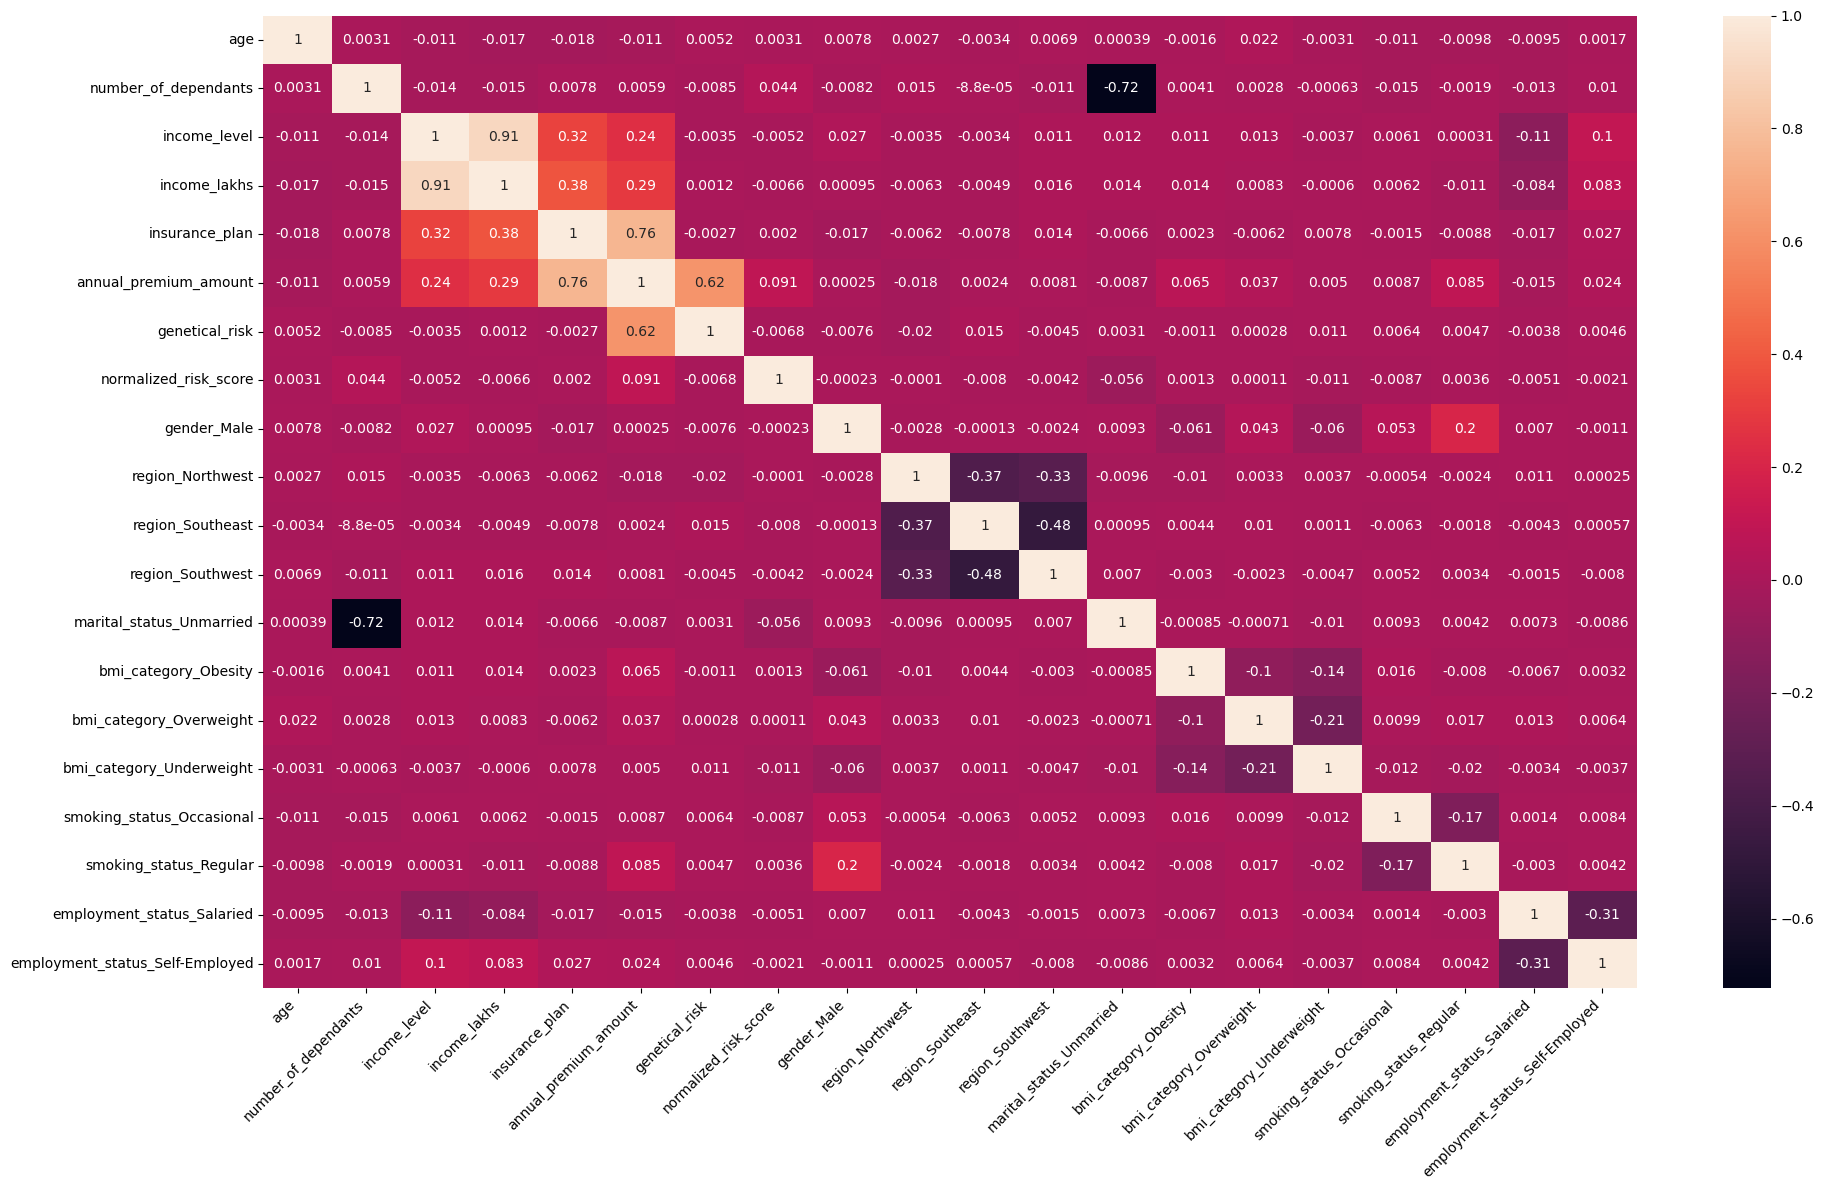

In [58]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Variance Inflation factor

In [87]:
X = df4.drop('annual_premium_amount', axis=1)
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants','income_lakhs','insurance_plan','genetical_risk']

scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.sample(4)


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
15163,0.571429,0.333333,4,0.494949,0.5,0.6,0.0,1,0,1,0,1,1,0,0,0,0,0,1
14124,0.428571,0.333333,4,0.959596,0.5,1.0,0.0,1,0,1,0,1,1,0,0,0,0,1,0
17475,0.142857,0.000000,2,0.090909,0.0,0.0,0.0,0,0,1,0,1,0,0,0,1,0,0,0
6554,1.000000,0.333333,3,0.272727,0.0,0.6,0.0,1,0,0,1,1,0,1,0,1,0,0,0


In [88]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,2.073982,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,1.042442,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,1.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,2.000000,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,3.000000,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [90]:
calculate_vif(X)

,Column,VIF
0,age,3.181997
1,number_of_dependants,2.117793
2,income_level,24.758868
3,income_lakhs,10.923404
4,insurance_plan,1.590223
5,genetical_risk,2.998987
6,normalized_risk_score,1.156015
7,gender_Male,2.331474
8,region_Northwest,2.185969
9,region_Southeast,3.042592


In [91]:
calculate_vif(X.drop('income_level', axis=1))

,Column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [92]:
X_reduced = X.drop('income_level', axis=1)
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


## Model Training

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=10)
print('X_train:', X_train.shape)
print('X_test:',X_test.shape)
print('y_train:', y_train.shape)
print('y_test:',y_test.shape)

X_train: (14060, 18)
X_test: (6026, 18)
y_train: (14060,)
y_test: (6026,)


In [94]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
train_score_lr = model_lr.score(X_train, y_train)
test_score_lr = model_lr.score(X_test,y_test)
train_score_lr, test_score_lr

(0.988297900194864, 0.9887263253056615)

In [95]:
from sklearn.metrics import mean_squared_error
y_pred  = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> \nMSE: ", mse_lr ,"\nRMSE: ", rmse_lr)

Linear Regression ==> 
MSE:  85732.34377930444 
RMSE:  292.8008602776031


In [96]:
model_lr.coef_

array([-7.22903185e+00,  1.95361819e+01, -1.26452776e+00,  7.00112526e+03,
        4.99698873e+03,  1.10914836e+03,  8.17798831e+00,  1.67735268e+00,
       -3.27532710e+00,  6.31709531e+00,  1.60689716e+01,  8.12844929e+02,
        4.00375598e+02,  1.07529819e+02,  2.05069661e+02,  6.10983280e+02,
        3.87836470e-02, -5.24201812e+00])

## Feature Importance

In [97]:
feature_importances = model_lr.coef_

coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df

,Coefficients
age,-7.229032
number_of_dependants,19.536182
income_lakhs,-1.264528
insurance_plan,7001.125261
genetical_risk,4996.988728
normalized_risk_score,1109.148365
gender_Male,8.177988
region_Northwest,1.677353
region_Southeast,-3.275327
region_Southwest,6.317095


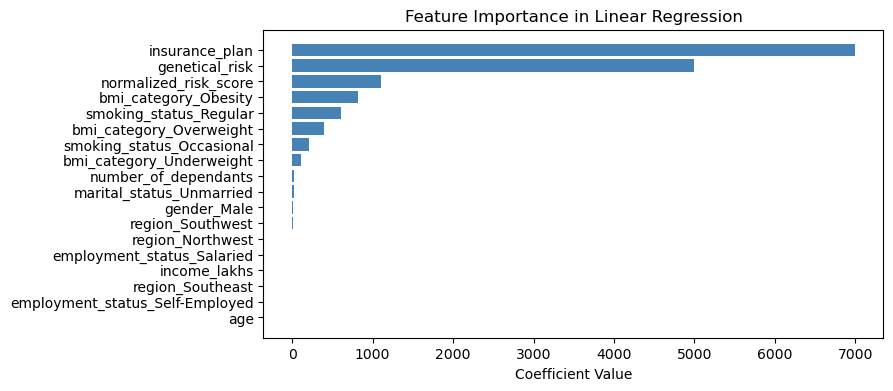

In [98]:
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [99]:
from sklearn.linear_model import Ridge, Lasso

model_rg = Ridge()
model_rg.fit(X_train,y_train)
train_score_rg = model_rg.score(X_train, y_train)
test_score_rg = model_rg.score(X_test,y_test)
train_score_rg, test_score_rg

(0.9882972960153418, 0.9887275909694276)

In [100]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)
train_score_xgb = model_xgb.score(X_train, y_train)
test_score_xgb = model_xgb.score(X_test,y_test)
train_score_xgb, test_score_xgb

(0.9925054907798767, 0.987729549407959)

In [101]:
best_model = model_lr

## Error Analysis

In [102]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
    
})
results_df.head()

,actual,predicted,diff,diff_pct
12774,6238,6121.456891,-116.543109,-1.868277
14758,9462,9601.797510,139.797510,1.477463
13205,5152,5611.056493,459.056493,8.910258
14278,6988,7423.486322,435.486322,6.231916
19351,4917,5112.056543,195.056543,3.966983


<Axes: xlabel='diff_pct', ylabel='Count'>

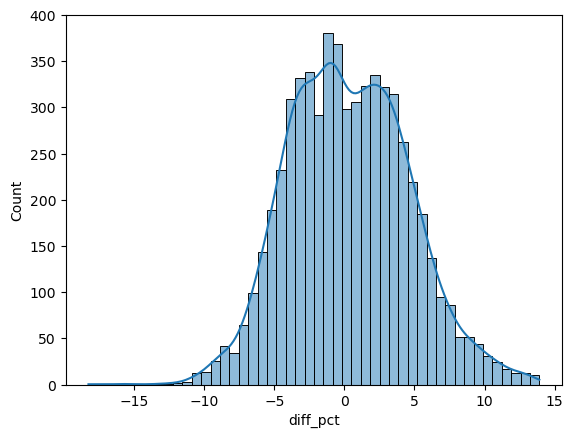

In [103]:
sns.histplot(results_df['diff_pct'], kde=True)

In [104]:
extreme_error_threshold = 10
extreme_results_df = results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]

In [105]:
extreme_results_df.shape , results_df.shape

((129, 4), (6026, 4))

In [106]:
extreme_errors_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_errors_pct

2.140723531364089

In [107]:
results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct', ascending=False)

,actual,predicted,diff,diff_pct


<Axes: xlabel='income_lakhs', ylabel='Count'>

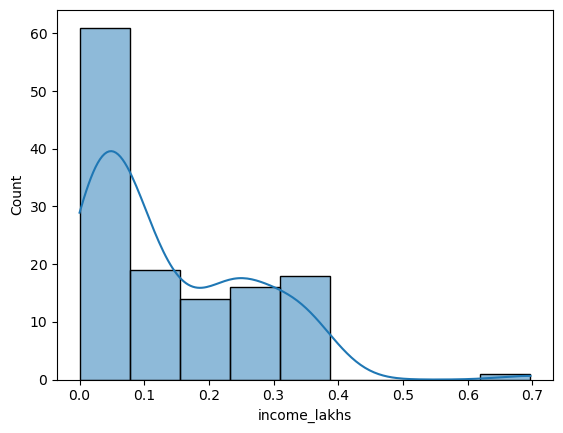

In [108]:
extreme_errors_df = X_test.loc[extreme_results_df.index]

sns.histplot(extreme_errors_df.income_lakhs, kde=True)


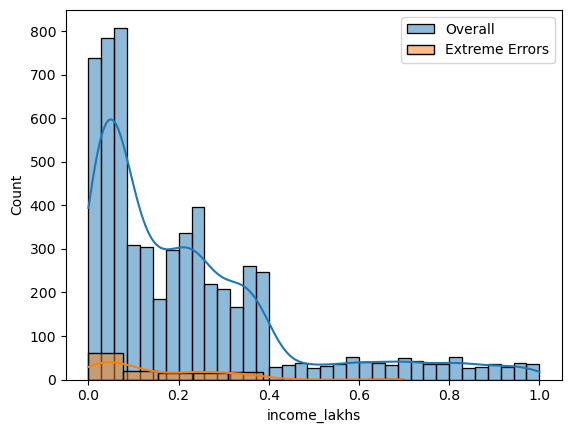

In [109]:
sns.histplot(X_test.income_lakhs, label='Overall', kde=True)
sns.histplot(extreme_errors_df.income_lakhs, label='Extreme Errors', kde=True)
plt.legend()
plt.show()

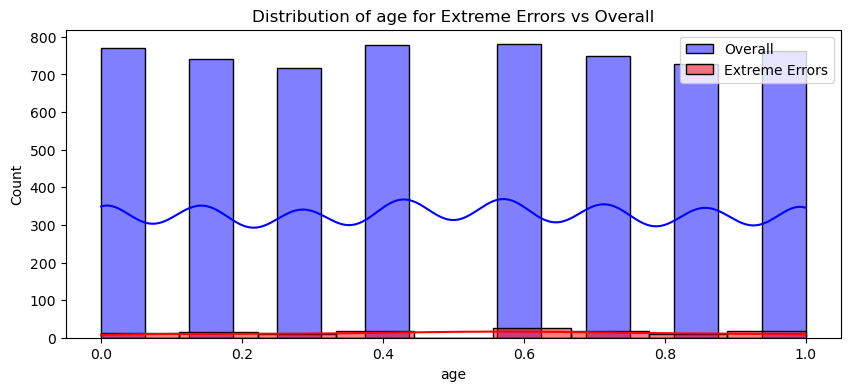

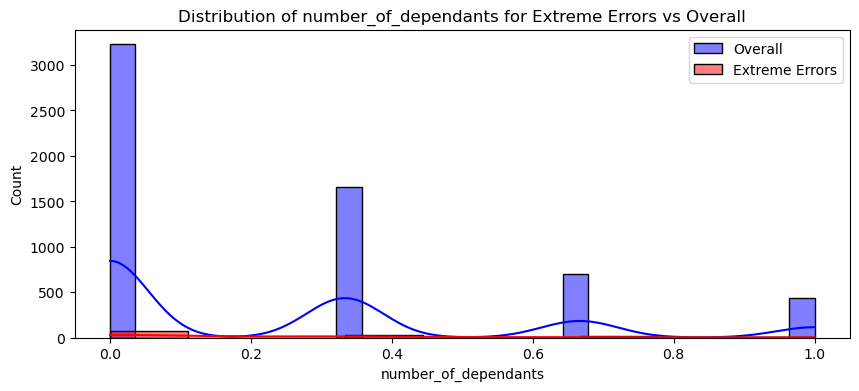

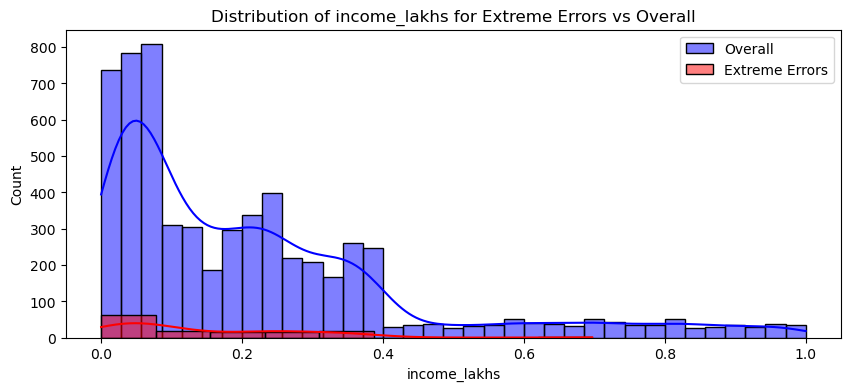

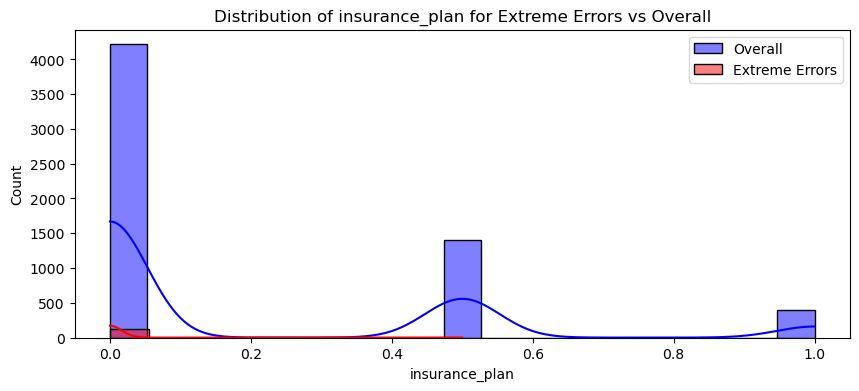

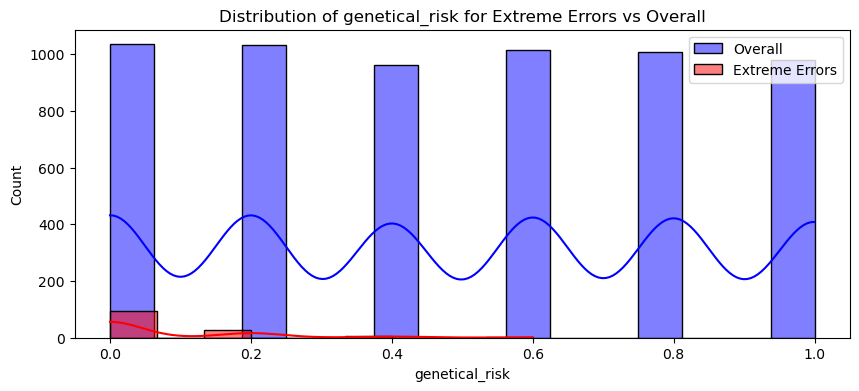

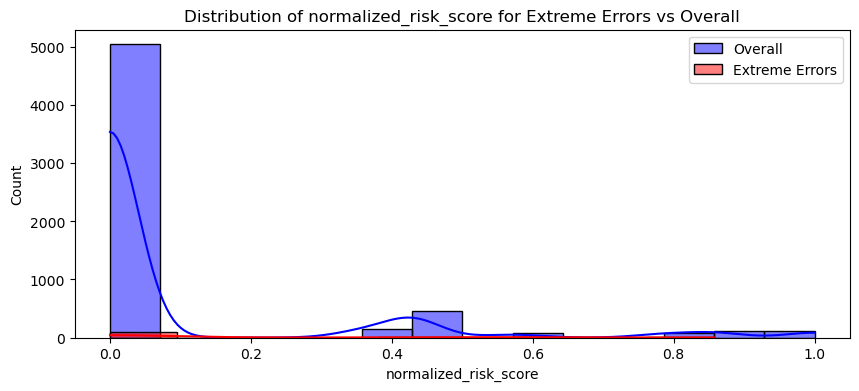

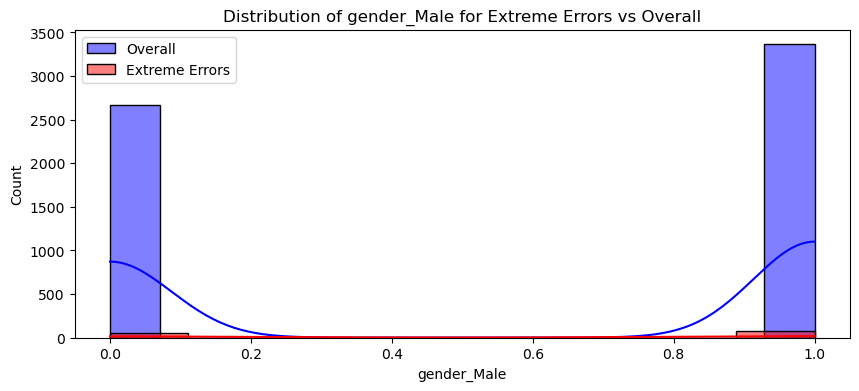

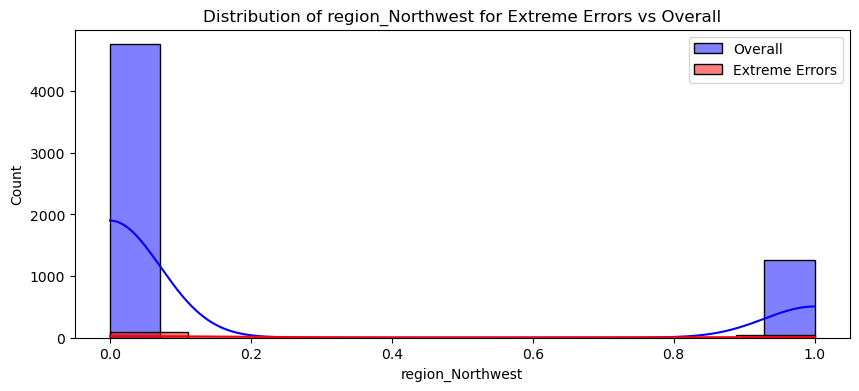

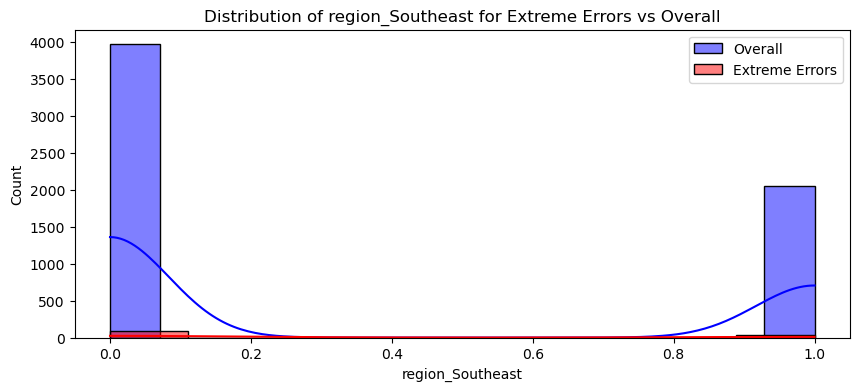

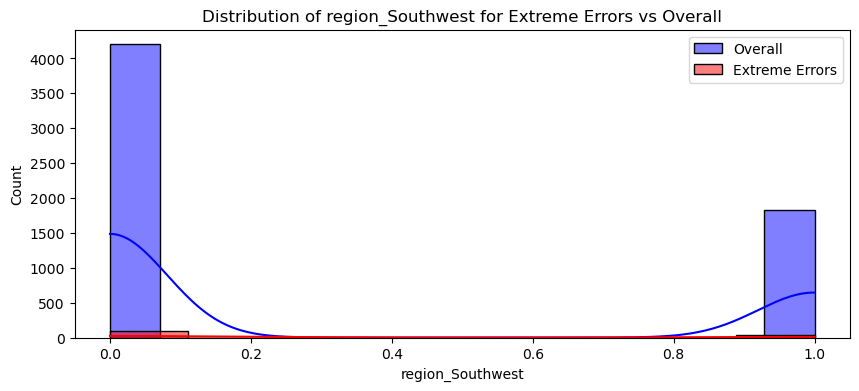

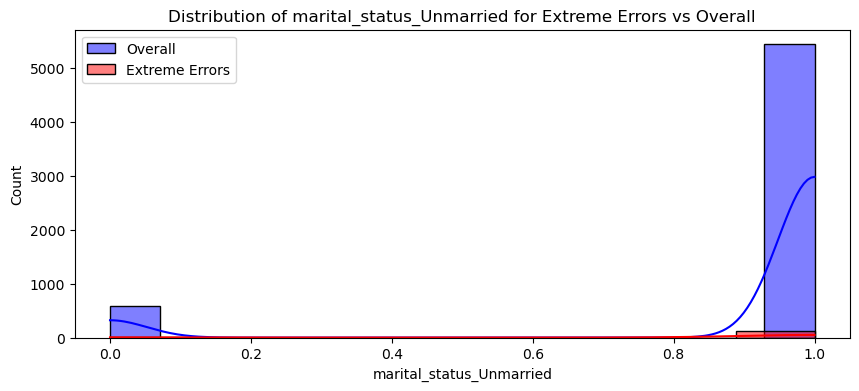

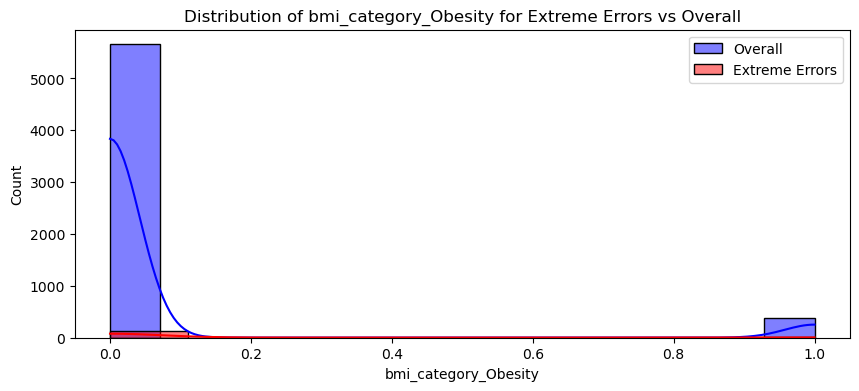

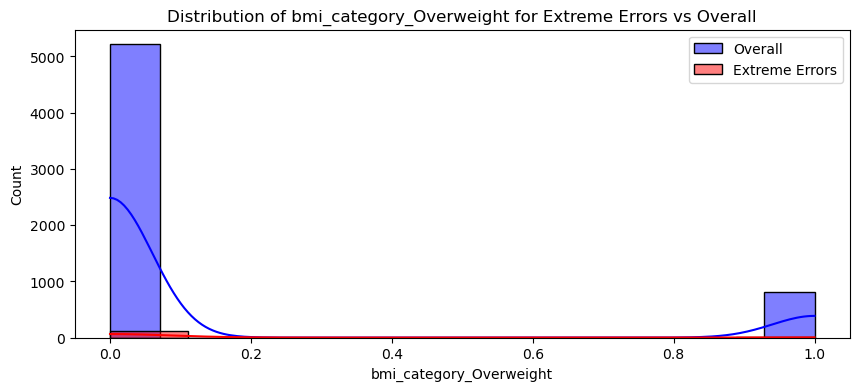

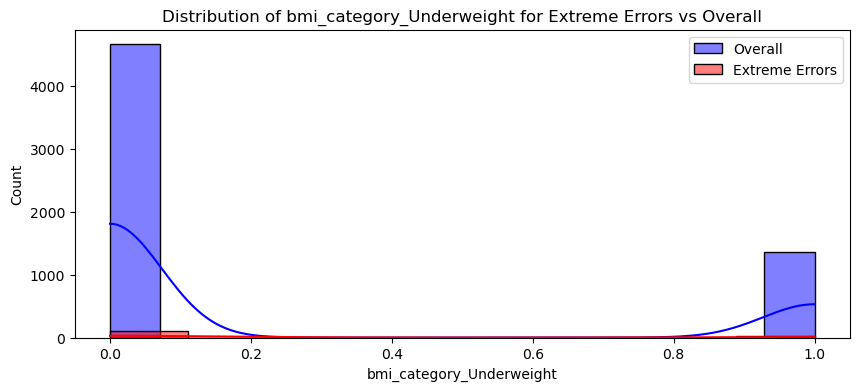

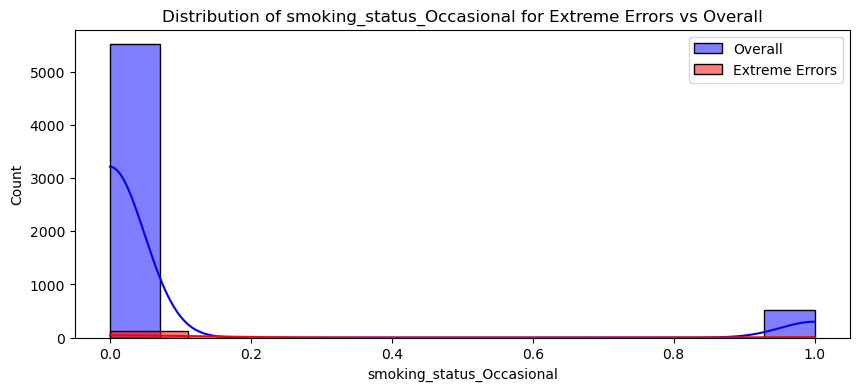

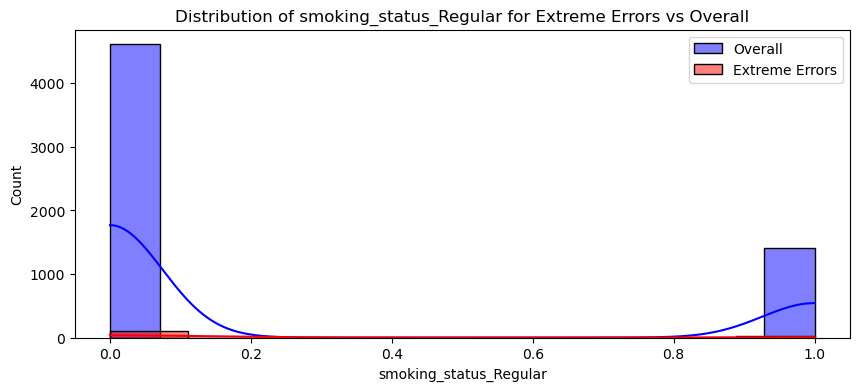

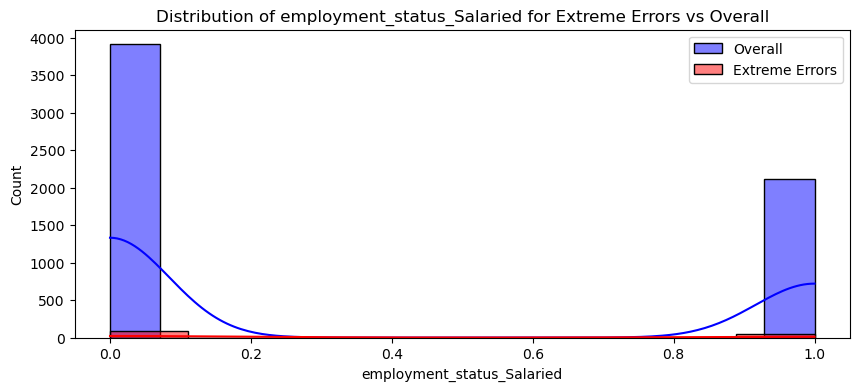

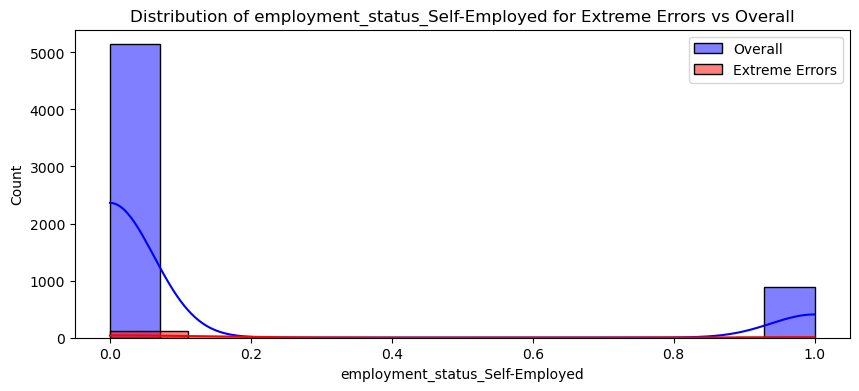

In [110]:
for feature in X_test.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(X_test[feature], color='blue',label='Overall', alpha=0.5, kde=True)
    sns.histplot(extreme_errors_df[feature],color='red',label='Extreme Errors', kde=True)
    plt.legend()
    plt.title(f"Distribution of {feature} for Extreme Errors vs Overall")
    plt.show()

## Export the Model

In [116]:
import joblib
from joblib import dump

In [117]:
dump(best_model, "artifacts/model_young.joblib")

['artifacts/model_young.joblib']

In [118]:
scaler_with_cols = {
    'scaler' : scaler,
    'cols_to_scale': cols_to_scale,
}
scaler_with_cols

{'scaler': MinMaxScaler(),
 'cols_to_scale': ['age',
  'number_of_dependants',
  'income_lakhs',
  'insurance_plan',
  'genetical_risk']}

In [119]:
dump(scaler_with_cols, "artifacts/scaler_young.joblib")

['artifacts/scaler_young.joblib']